In [52]:
import pandas as pd

DATA_FILE = '../data/df_group.csv'
df = pd.read_csv(DATA_FILE)

df

,统计月份,放款月份,mob,利率,放款期限,初始评级,借款类型,放款金额,放款件数,余额,...,M6余额件数,M7余额件数,M1+余额,M2+余额,M3+余额,M4+余额,M1+余额件数,M2+余额件数,M3+余额件数,M4+余额件数
0,2015-01,2015-01,0,14.0,6,A,普通,4300.0,1.0,4300.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01,2015-01,0,16.0,6,B,普通,4400.0,1.0,4400.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01,2015-01,0,16.0,6,B,电商,369000.0,3.0,369000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01,2015-01,0,18.0,1,D,其他,1000.0,1.0,1000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01,2015-01,0,18.0,1,E,其他,1000.0,1.0,1000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18008,2017-01,2017-01,0,22.0,12,E,普通,295463.0,79.0,292294.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18009,2017-01,2017-01,0,22.0,12,F,其他,113217.0,36.0,112664.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18010,2017-01,2017-01,0,22.0,12,F,普通,43057.0,12.0,43057.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18011,2017-01,2017-01,0,24.0,12,C,普通,4000.0,1.0,3701.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
def vintage(loan_term, loan_type, initial_rating):
    df_vintage_src = df[df.mob > 0]
    if loan_term:
        df_vintage_src = df_vintage_src[df_vintage_src['放款期限'] == int(loan_term)]
    if loan_type:
        df_vintage_src = df_vintage_src[df_vintage_src['借款类型'] == loan_type]
    if initial_rating:
        df_vintage_src = df_vintage_src[df_vintage_src['初始评级'] == initial_rating]
        
    d1 = pd.pivot_table(df_vintage_src,index='放款月份',columns='mob',values='M2+余额', aggfunc='sum')
    d2 = pd.pivot_table(df_vintage_src,index='放款月份',columns='mob',values='放款金额',aggfunc='sum')
    vintage_M2_gt = d1/d2
    f1 = vintage_M2_gt.index[-12: ]
    f2 = vintage_M2_gt.columns[ :12]
    vintage_df = vintage_M2_gt.loc[f1, f2] # type: ignore

    return vintage_df

In [54]:
vintage_df = vintage('', '', '')
vintage_df

mob,1,2,3,4,5,6,7,8,9,10,11,12
放款月份,,,,,,,,,,,,
2016-01,0.0,0.006744,0.009802,0.014513,0.022030,0.026288,0.025177,0.029430,0.035198,0.037189,0.038704,0.038543
2016-02,0.0,0.005267,0.011740,0.019909,0.020825,0.026643,0.031956,0.040108,0.041276,0.043092,0.043518,NaN
2016-03,0.0,0.003749,0.009849,0.017715,0.022918,0.027860,0.032856,0.037696,0.039963,0.040195,NaN,NaN
2016-04,0.0,0.006035,0.010922,0.018264,0.025047,0.031813,0.032275,0.034168,0.037832,NaN,NaN,NaN
2016-05,0.0,0.007282,0.011414,0.013746,0.021320,0.025223,0.030652,0.033757,NaN,NaN,NaN,NaN
2016-06,0.0,0.005506,0.009749,0.014661,0.019652,0.022307,0.025103,NaN,NaN,NaN,NaN,NaN
2016-07,0.0,0.005860,0.012763,0.014037,0.018266,0.024945,NaN,NaN,NaN,NaN,NaN,NaN
2016-08,0.0,0.005169,0.009385,0.013536,0.017566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09,0.0,0.003869,0.007612,0.010753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
vintage_df.loc['2016-01']

mob
1     0.000000
2     0.006744
3     0.009802
4     0.014513
5     0.022030
6     0.026288
7     0.025177
8     0.029430
9     0.035198
10    0.037189
11    0.038704
12    0.038543
Name: 2016-01, dtype: float64

In [71]:
new_data2 = {}
mobs = vintage_df.columns.tolist()
new_data2['MOB'] = mobs
for i in vintage_df.index:
    new_data2[i] = vintage_df.loc[i].values.tolist()

pd.DataFrame(data=new_data2)

,MOB,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,2,0.006744,0.005267,0.003749,0.006035,0.007282,0.005506,0.005860,0.005169,0.003869,0.004157,0.00395,NaN
2,3,0.009802,0.011740,0.009849,0.010922,0.011414,0.009749,0.012763,0.009385,0.007612,0.005736,NaN,NaN
3,4,0.014513,0.019909,0.017715,0.018264,0.013746,0.014661,0.014037,0.013536,0.010753,NaN,NaN,NaN
4,5,0.022030,0.020825,0.022918,0.025047,0.021320,0.019652,0.018266,0.017566,NaN,NaN,NaN,NaN
5,6,0.026288,0.026643,0.027860,0.031813,0.025223,0.022307,0.024945,NaN,NaN,NaN,NaN,NaN
6,7,0.025177,0.031956,0.032856,0.032275,0.030652,0.025103,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0.029430,0.040108,0.037696,0.034168,0.033757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0.035198,0.041276,0.039963,0.037832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0.037189,0.043092,0.040195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# 转换格式
new_data1 = {}
new_data1[vintage_df.index.name] = vintage_df.index.values
for i in range(vintage_df.shape[1]):
    new_data1['mob{}'.format(i)] = vintage_df.iloc[:, i].values

dd = pd.DataFrame(data=new_data1)
dd

,放款月份,mob0,mob1,mob2,mob3,mob4,mob5,mob6,mob7,mob8,mob9,mob10,mob11
0,2016-01,0.0,0.006744,0.009802,0.014513,0.022030,0.026288,0.025177,0.029430,0.035198,0.037189,0.038704,0.038543
1,2016-02,0.0,0.005267,0.011740,0.019909,0.020825,0.026643,0.031956,0.040108,0.041276,0.043092,0.043518,NaN
2,2016-03,0.0,0.003749,0.009849,0.017715,0.022918,0.027860,0.032856,0.037696,0.039963,0.040195,NaN,NaN
3,2016-04,0.0,0.006035,0.010922,0.018264,0.025047,0.031813,0.032275,0.034168,0.037832,NaN,NaN,NaN
4,2016-05,0.0,0.007282,0.011414,0.013746,0.021320,0.025223,0.030652,0.033757,NaN,NaN,NaN,NaN
5,2016-06,0.0,0.005506,0.009749,0.014661,0.019652,0.022307,0.025103,NaN,NaN,NaN,NaN,NaN
6,2016-07,0.0,0.005860,0.012763,0.014037,0.018266,0.024945,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-08,0.0,0.005169,0.009385,0.013536,0.017566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-09,0.0,0.003869,0.007612,0.010753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-10,0.0,0.004157,0.005736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_transposed = dd.T
df_transposed.columns = df_transposed.iloc[0]  # 设置第一行作为列名
df_transposed = df_transposed[1:]  # 删除第一行
df_transposed

放款月份,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
mob0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mob1,0.006744,0.005267,0.003749,0.006035,0.007282,0.005506,0.00586,0.005169,0.003869,0.004157,0.00395,NaN
mob2,0.009802,0.01174,0.009849,0.010922,0.011414,0.009749,0.012763,0.009385,0.007612,0.005736,NaN,NaN
mob3,0.014513,0.019909,0.017715,0.018264,0.013746,0.014661,0.014037,0.013536,0.010753,NaN,NaN,NaN
mob4,0.02203,0.020825,0.022918,0.025047,0.02132,0.019652,0.018266,0.017566,NaN,NaN,NaN,NaN
mob5,0.026288,0.026643,0.02786,0.031813,0.025223,0.022307,0.024945,NaN,NaN,NaN,NaN,NaN
mob6,0.025177,0.031956,0.032856,0.032275,0.030652,0.025103,NaN,NaN,NaN,NaN,NaN,NaN
mob7,0.02943,0.040108,0.037696,0.034168,0.033757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mob8,0.035198,0.041276,0.039963,0.037832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mob9,0.037189,0.043092,0.040195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_transposed.index.tolist()

['mob0',
 'mob1',
 'mob2',
 'mob3',
 'mob4',
 'mob5',
 'mob6',
 'mob7',
 'mob8',
 'mob9',
 'mob10',
 'mob11']

In [62]:
df_transposed.columns.tolist()

['2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12']

In [36]:
import streamlit as st
import pandas as pd
import numpy as np

chart_data = pd.DataFrame(
    np.random.randn(20, 3), columns=["col1", "col2", "col3"]
)

chart_data

,col1,col2,col3
0,0.140775,0.442605,-1.147606
1,1.880706,-0.754156,-0.053900
2,0.055465,0.786271,-0.689408
3,-1.374820,0.522956,0.050284
4,0.017081,-0.399317,-2.218464
5,-0.634100,-2.305285,-0.431123
6,1.458171,-0.211080,0.431723
7,-1.220027,2.141470,1.039656
8,-0.472178,-0.640352,-2.773591
9,0.351168,0.323006,-0.907307


In [12]:
filtered_data = vintage('', '', '')

filtered_data

mob,1,2,3,4,5,6,7,8,9,10,11,12
放款月份,,,,,,,,,,,,
2016-01,0.0,0.006744,0.009802,0.014513,0.022030,0.026288,0.025177,0.029430,0.035198,0.037189,0.038704,0.038543
2016-02,0.0,0.005267,0.011740,0.019909,0.020825,0.026643,0.031956,0.040108,0.041276,0.043092,0.043518,NaN
2016-03,0.0,0.003749,0.009849,0.017715,0.022918,0.027860,0.032856,0.037696,0.039963,0.040195,NaN,NaN
2016-04,0.0,0.006035,0.010922,0.018264,0.025047,0.031813,0.032275,0.034168,0.037832,NaN,NaN,NaN
2016-05,0.0,0.007282,0.011414,0.013746,0.021320,0.025223,0.030652,0.033757,NaN,NaN,NaN,NaN
2016-06,0.0,0.005506,0.009749,0.014661,0.019652,0.022307,0.025103,NaN,NaN,NaN,NaN,NaN
2016-07,0.0,0.005860,0.012763,0.014037,0.018266,0.024945,NaN,NaN,NaN,NaN,NaN,NaN
2016-08,0.0,0.005169,0.009385,0.013536,0.017566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09,0.0,0.003869,0.007612,0.010753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
filtered_data.T

放款月份,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
mob,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,0.006744,0.005267,0.003749,0.006035,0.007282,0.005506,0.005860,0.005169,0.003869,0.004157,0.00395,NaN
3,0.009802,0.011740,0.009849,0.010922,0.011414,0.009749,0.012763,0.009385,0.007612,0.005736,NaN,NaN
4,0.014513,0.019909,0.017715,0.018264,0.013746,0.014661,0.014037,0.013536,0.010753,NaN,NaN,NaN
5,0.022030,0.020825,0.022918,0.025047,0.021320,0.019652,0.018266,0.017566,NaN,NaN,NaN,NaN
6,0.026288,0.026643,0.027860,0.031813,0.025223,0.022307,0.024945,NaN,NaN,NaN,NaN,NaN
7,0.025177,0.031956,0.032856,0.032275,0.030652,0.025103,NaN,NaN,NaN,NaN,NaN,NaN
8,0.029430,0.040108,0.037696,0.034168,0.033757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.035198,0.041276,0.039963,0.037832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df['放款期限'].unique().tolist().sort()

In [18]:
filtered_data.T.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='mob')

In [19]:
import streamlit as st

st.line_chart(filtered_data.T.index)

2024-10-09 09:52:19.394 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 09:52:19.471 
  command:

    streamlit run c:\Users\dtfsm\anaconda3\envs\risk_tools\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-09 09:52:19.472 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

'c:/Users/dtfsm/Documents/project/MyCode/AIRA/test_demo/exports/charts/temp_chart.png'

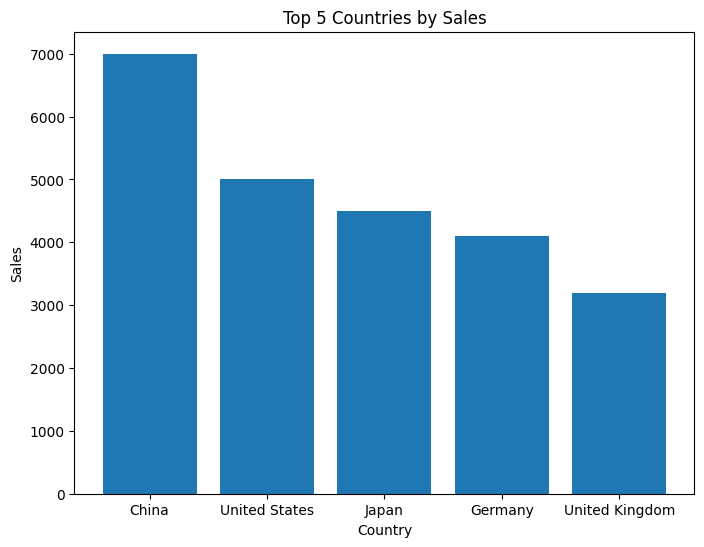

In [2]:
import os
import pandas as pd
from pandasai import SmartDataframe
from langchain_groq import ChatGroq

langchain_llm = ChatGroq(
    model="llama3-70b-8192",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)


# Sample DataFrame
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

df = SmartDataframe(sales_by_country, config={'llm': langchain_llm})
df.chat('Which are the top 5 countries by sales?')
# Output: China, United States, Japan, Germany, Australia


<string>:8: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 27454 (\N{CJK UNIFIED IDEOGRAPH-6B3E}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
<string>:8: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4

'c:/Users/dtfsm/Documents/project/MyCode/AIRA/test_demo/exports/charts/temp_chart.png'

c:\Users\dtfsm\anaconda3\envs\risk_tools\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dtfsm\anaconda3\envs\risk_tools\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27454 (\N{CJK UNIFIED IDEOGRAPH-6B3E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dtfsm\anaconda3\envs\risk_tools\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dtfsm\anaconda3\envs\risk_tools\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dtfsm\anaconda3\envs\risk_tools\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarni

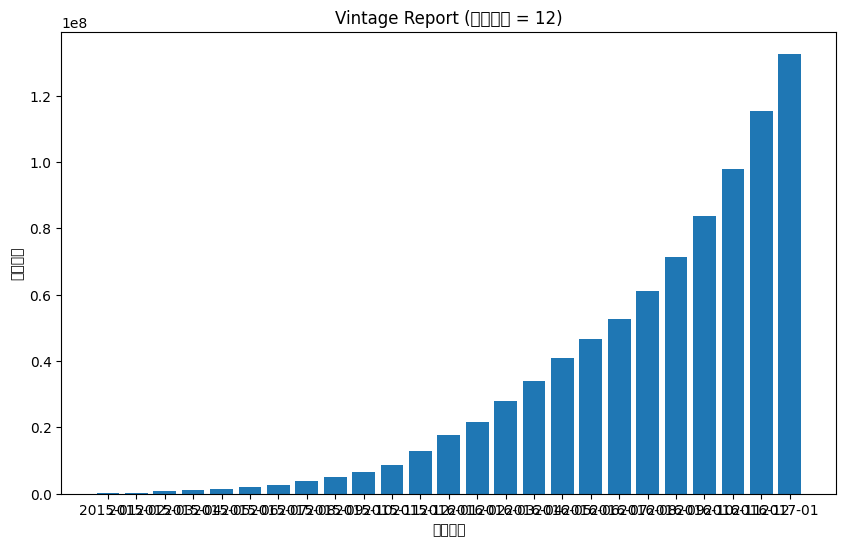

In [21]:
import streamlit as st
import pandas as pd
from langchain_groq import ChatGroq
# from pandasai import SmartDataframe
# from pandasai import SmartDatalake
from pandasai import Agent
from pandasai.responses.streamlit_response import StreamlitResponse



def get_agent(data,llm):
    """
    The function creates an agent on the dataframes exctracted from the uploaded files
    Args: 
        data: A Dictionary with the dataframes extracted from the uploaded data
        llm:  llm object based on the ll type selected
    Output: PandasAI Agent
    """
    agent = Agent([data], config = {"llm":llm,"verbose": True, "response_parser": StreamlitResponse }) #StreamlitResponse #"response_parser": StreamlitResponse2

    return agent


DATA_FILE = '../data/df_group.csv'
df = pd.read_csv(DATA_FILE)

llm = ChatGroq(
                model="llama3-70b-8192",
                temperature=0,
                max_tokens=None,
                timeout=None,
                max_retries=2,
                # other params...
            )

analyst = get_agent(df, llm)
aa = analyst.chat("生成放款期限为12的vintage报表")

aa

In [23]:
from pandasai.skills import skill

@skill
def vintage(loan_term, loan_type, initial_rating):
    """
    Displays the bar chart having name on x-axis and salaries on y-axis using streamlit
    Args:
        names (list[str]): Employees' names
        salaries (list[int]): Salaries
    """
    df_vintage_src = df[df.mob > 0]
    if loan_term:
        df_vintage_src = df_vintage_src[df_vintage_src['放款期限'] == int(loan_term)]
    if loan_type:
        df_vintage_src = df_vintage_src[df_vintage_src['借款类型'] == loan_type]
    if initial_rating:
        df_vintage_src = df_vintage_src[df_vintage_src['初始评级'] == initial_rating]
        
    d1 = pd.pivot_table(df_vintage_src,index='放款月份',columns='mob',values='M2+余额', aggfunc='sum')
    d2 = pd.pivot_table(df_vintage_src,index='放款月份',columns='mob',values='放款金额',aggfunc='sum')
    vintage_M2_gt = d1/d2
    f1 = vintage_M2_gt.index[-12: ]
    f2 = vintage_M2_gt.columns[ :12]
    vintage_df = vintage_M2_gt.loc[f1, f2] # type: ignore

    print(vintage_df)

analyst.add_skills(vintage)


aa = analyst.chat("生成放款期限为12的vintage数据")

aa

ValueError: Skill with name 'vintage' already exists.

'c:/Users/dtfsm/Documents/project/MyCode/AIRA/test_demo/exports/charts/temp_chart.png'

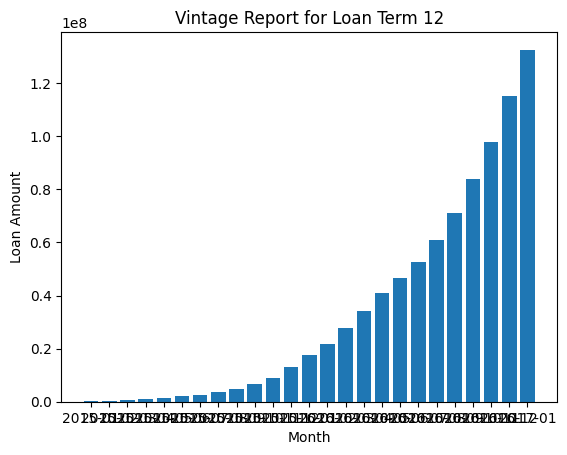

In [24]:
analyst.chat("生成放款期限为12的vintage数据")


In [28]:
import os

import pandas as pd

from pandasai import Agent

employees_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John", "Emma", "Liam", "Olivia", "William"],
    "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
}

salaries_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

llm = ChatGroq(
                model="llama3-70b-8192",
                temperature=0,
                max_tokens=None,
                timeout=None,
                max_retries=2,
                # other params...
            )

agent = Agent([employees_df, salaries_df],  config = {"llm":llm,"verbose": True, "response_parser": StreamlitResponse }, memory_size=10)

# Chat with the agent
response = agent.chat("Who gets paid the most?")
print(response)


# Get Clarification Questions
# questions = agent.clarification_questions("Who gets paid the most?")
# for question in questions:
#     print(question)

# Explain how the chat response is generated
response = agent.explain()
print(response)

# Train with data
queries = [
    "Display the distribution of ages in the population.",
    "Visualize the distribution of product ratings.",
    "Show the distribution of household incomes in a region.",
]

codes = [
    "display_age_distribution()",
    "visualize_product_ratings_distribution()",
    "show_household_incomes_distribution_in_region()",
]

import os

os.environ["PANDASAI_API_KEY"] = "$2a$10$62e6is90AUJp3UGCauD5bu9NFf6Q2iR.z9x7SLmKSulnJGBoboxau"
agent.train(queries, codes)

print("Done")

The highest salary is 7000 and it belongs to Olivia.
So, in our previous conversation, we were trying to find out who gets paid the most. To do that, we needed to combine two sets of data (like two spreadsheets) into one, so we can look at all the information together.

Imagine you have two boxes, one with employee IDs and salaries, and another with employee IDs and names. We need to match the IDs in both boxes to connect the salaries with the correct names.

Once we have all the data together, we want to find the highest salary. It's like finding the biggest number in a list. We then take that highest salary and find the name associated with it.

Finally, we put the highest salary and the corresponding name into a sentence, like "The highest salary is X and it belongs to Y." That's the result we want to show.

The code I wrote is like a set of instructions to do all these steps. It's like a recipe to find the highest salary and the employee who earns it.


PandasAIApiCallError: Training failed because of internal server error try again later!

In [33]:

import os
import pandas as pd
from pandasai import SmartDatalake
from pandasai.responses.response_parser import ResponseParser

# This class overrides default behaviour how dataframe is returned
# By Default PandasAI returns the SmartDataFrame
class PandasDataFrame(ResponseParser):

    def __init__(self, context) -> None:
        super().__init__(context)

    def format_dataframe(self, result):
        # Returns Pandas Dataframe instead of SmartDataFrame
        return result["value"]


employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
os.environ["PANDASAI_API_KEY"] = "$2a$10$62e6is90AUJp3UGCauD5bu9NFf6Q2iR.z9x7SLmKSulnJGBoboxau"

agent = SmartDatalake(
    [employees_df, salaries_df],
    config={"llm": llm, "verbose": True }, #"response_parser": PandasDataFrame
)

response = agent.chat("Return a dataframe of name against salaries")
# Returns the response as Pandas DataFrame



In [35]:
type(response)

pandas.core.frame.DataFrame

In [42]:

import os
import pandas as pd
from pandasai import SmartDatalake
from pandasai.responses.streamlit_response import StreamlitResponse

employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)


# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
os.environ["PANDASAI_API_KEY"] = "$2a$10$62e6is90AUJp3UGCauD5bu9NFf6Q2iR.z9x7SLmKSulnJGBoboxau"

agent = SmartDatalake(
    [employees_df, salaries_df],
    config={"verbose": True, "response_parser": StreamlitResponse},
)

aa = agent.chat("sum salaries against name")
aa

,Name,Total Salary
0,John,5000
1,Emma,6000
2,Liam,4500
3,Olivia,7000
4,William,5500


In [43]:
type(aa)

pandas.core.frame.DataFrame

In [5]:

import pandas as pd
import numpy as np

pd.DataFrame(np.random.randn(20, 1), columns=["a"], index=[ 'a{}'.format(i) for i in range(20)])

,a
a0,-0.035426
a1,-0.380027
a2,0.777913
a3,0.682252
a4,0.852898
a5,-0.016809
a6,-0.591250
a7,-0.802077
a8,0.132332
a9,-1.286039


In [8]:
['上月余额M{}'.format(i) for i in range(1, 8)] + ['上月正常余额']

['上月余额M1',
 '上月余额M2',
 '上月余额M3',
 '上月余额M4',
 '上月余额M5',
 '上月余额M6',
 '上月余额M7',
 '上月正常余额']

In [10]:
reapy_df = pd.read_csv('../data/repyament_table.csv')
reapy_df

,借据号,期数,应还时间,应还本金,应还利息,实还时间,实还本金,实还利息,统计时间
0,133291,1,2015-04-16,718.12,157.55,2015-03-17,718.12,157.55,2017-02-22
1,133291,2,2015-05-16,730.09,145.58,2015-03-17,730.09,145.58,2017-02-22
2,133291,3,2015-06-16,742.26,133.41,2015-03-17,742.26,133.41,2017-02-22
3,133291,4,2015-07-16,754.63,121.04,2015-03-17,754.63,121.04,2017-02-22
4,133291,5,2015-08-16,767.21,108.46,2015-03-17,767.21,108.46,2017-02-22
...,...,...,...,...,...,...,...,...,...
510844,32819511,8,2017-09-30,546.34,47.07,\N,0.00,0.00,2017-02-22
510845,32819511,9,2017-10-30,555.45,37.96,\N,0.00,0.00,2017-02-22
510846,32819511,10,2017-11-30,564.71,28.70,\N,0.00,0.00,2017-02-22
510847,32819511,11,2017-12-30,574.12,19.29,\N,0.00,0.00,2017-02-22


In [23]:
reapy_df[reapy_df['期数'] == 1]['实还时间'].value_counts()

实还时间
\N            1370
2017-02-20     305
2017-02-17     289
2017-01-09     277
2017-02-19     257
              ... 
2015-03-04       1
2015-01-28       1
2015-03-08       1
2015-06-25       1
2015-03-17       1
Name: count, Length: 734, dtype: int64

In [28]:
reapy_df['实还时间'].isna().value_counts()

实还时间
False    510849
Name: count, dtype: int64

In [29]:
from datetime import datetime

def days_difference(date1_str, date2_str):
    """
    计算两个日期字符串之间的天数差
    参数格式：'YYYY-MM-DD'
    """
    if date2_str == '\\N':
        return 999999

    # 将日期字符串转换为日期对象
    date1 = datetime.strptime(date1_str, '%Y-%m-%d')
    date2 = datetime.strptime(date2_str, '%Y-%m-%d')
    
    # 计算日期差
    delta = date2 - date1
    
    # 返回天数差
    return delta.days

reapy_df['迟还天数'] = reapy_df[['应还时间', '实还时间']].apply(lambda x: days_difference(x['应还时间'], x['实还时间']), axis=1)

In [33]:
reapy_df[['迟还天数']].apply(lambda x: 1 if x['迟还天数'] > 0 else 0, axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
510844    1
510845    1
510846    1
510847    1
510848    1
Length: 510849, dtype: int64